In [1]:
import intake
import os.path
import xarray as xr
from utils import plotter
from analogs import calculate_analogs, load_LENS_dataset, print_analog_stats, plot_analog_validation

In [2]:
lat, lon = 33.1072795,35.4688208
#lat, lon = 20.194824,-100.9225607

In [5]:
URL = "/home/jhexr/code/clustering_analogs/data/aws-cesm1-le.json"
if not os.path.isfile(URL):
    URL = "https://ncar-cesm-lens.s3-us-west-2.amazonaws.com/\
        catalogs/aws-cesm1-le.json"

In [6]:
#LENS_dataset = load_LENS_dataset(URL)
#LENS_dataset.to_netcdf("./data/Lens_dataset.nc")
LENS_dataset = xr.open_dataset('./data/Lens_dataset.nc')
print(LENS_dataset)


--&gt; The keys in the returned dictionary of datasets are constructed as follows:
	&#39;component.experiment.frequency&#39;


&lt;IPython.core.display.HTML object&gt;


Dataset dictionary keys:
 dict_keys([&#39;atm.HIST.monthly&#39;, &#39;atm.RCP85.monthly&#39;, &#39;atm.20C.monthly&#39;])
&lt;xarray.Dataset&gt;
Dimensions:    (lat: 192, lon: 288, member_id: 40, time: 181)
Coordinates:
  * time       (time) object 1920-01-01 00:00:00 ... 2100-01-01 00:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
Data variables:
    TREFHT     (member_id, time, lat, lon) float32 dask.array&lt;chunksize=(1, 1, 192, 288), meta=np.ndarray&gt;
    PRECC      (member_id, time, lat, lon) float32 dask.array&lt;chunksize=(1, 1, 192, 288), meta=np.ndarray&gt;


In [8]:
curr_analogs = calculate_analogs(
    LENS_dataset, lat, lon, 
    ['TREFHT', 'PRECC'], LENS_dataset, 
    '2000-01-01', '2009-12-31', 
    '2000-01-01', '2009-12-31')

In [ ]:
curr_analogs = curr_analogs.load()
print("Done")
print(curr_analogs)

In [3]:
curr_analogs = xr.open_dataset('./data/cesm.nc')

In [11]:
print(curr_analogs)
print("\nSED")
print(curr_analogs['Standardized Euclidean Distance'])
curr_distances = curr_analogs['Standardized Euclidean Distance'].mean(dim='member_id')
print("\nCurrD")
print(curr_distances)

&lt;xarray.Dataset&gt;
Dimensions:                          (lat: 192, lon: 288, member_id: 40)
Coordinates:
  * lat                              (lat) float64 -90.0 -89.06 ... 89.06 90.0
  * lon                              (lon) float64 0.0 1.25 2.5 ... 357.5 358.8
  * member_id                        (member_id) int64 1 2 3 4 ... 103 104 105
Data variables:
    TREFHT                           (member_id, lat, lon) float32 ...
    PRECC                            (member_id, lat, lon) float32 ...
    Standardized Euclidean Distance  (member_id, lat, lon) float32 39.84716 ....

SED
&lt;xarray.DataArray &#39;Standardized Euclidean Distance&#39; (member_id: 40, lat: 192, lon: 288)&gt;
array([[[39.84716 , 39.752014, ..., 39.847805, 39.73998 ],
        [39.598377, 39.57183 , ..., 39.67403 , 39.68881 ],
        ...,
        [22.904818, 22.899078, ..., 22.916864, 22.910732],
        [22.922474, 22.922247, ..., 22.92298 , 22.9227  ]],

       [[39.84288 , 39.749416, ..., 39.843746, 39.73678

Reuse existing file: nearest_s2d_720x1440_192x288.nc
using dimensions (&#39;lat&#39;, &#39;lon&#39;) from data variable lsmask as the horizontal dimensions for this dataset.


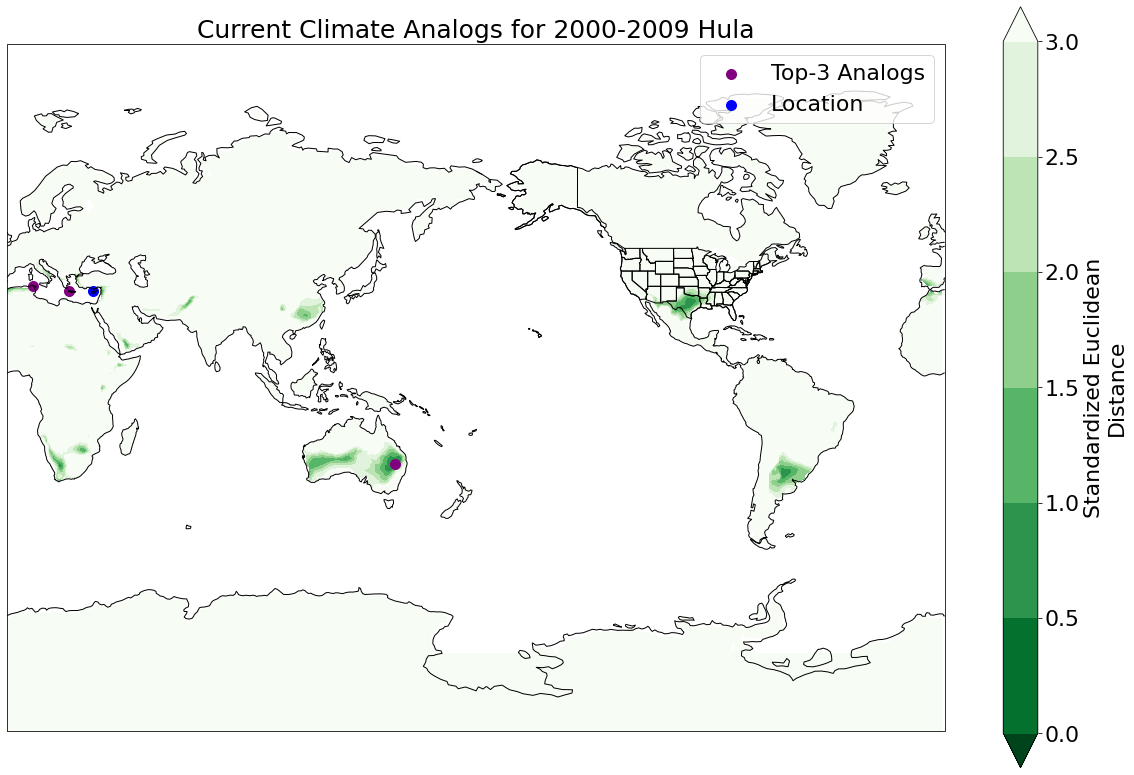

In [6]:

top_K_coords = plotter(
    curr_distances, 'Greens_r',
    'Current Climate Analogs for 2000-2009 Hula', 
    0, 3, 3, location=(lat, lon))